In [3]:
import pandas as pd
import matplotlib.pyplot as plt

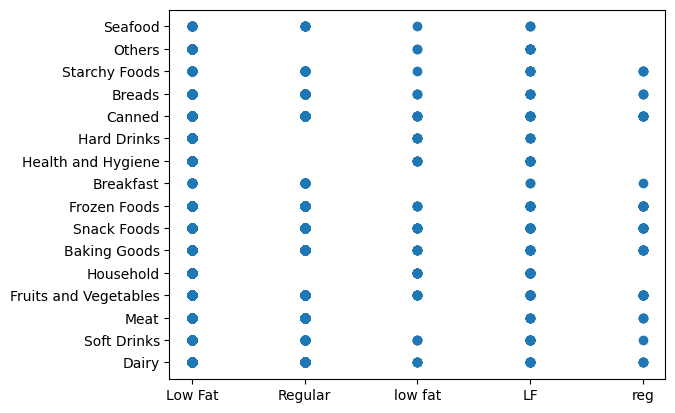

In [4]:
train_data=pd.read_csv("train.csv")
plt.scatter(x=train_data['X3'],y=train_data['X5'])

['15' '01' '07' '19' '36' '10' '17' '28' '03' '32' '46' '49' '42' '11'
 '02' '22' '12' '30' '37' '06' '59' '51' '14' '38' '33' '23' '29' '20'
 '34' '43' '50' '39' '05' '40' '13' '18' '21' '54' '35' '26' '27' '09'
 '45' '58' '48' '04' '25' '55' '44' '41' '56' '57' '47' '60' '52' '16'
 '53' '31' '24' '08']


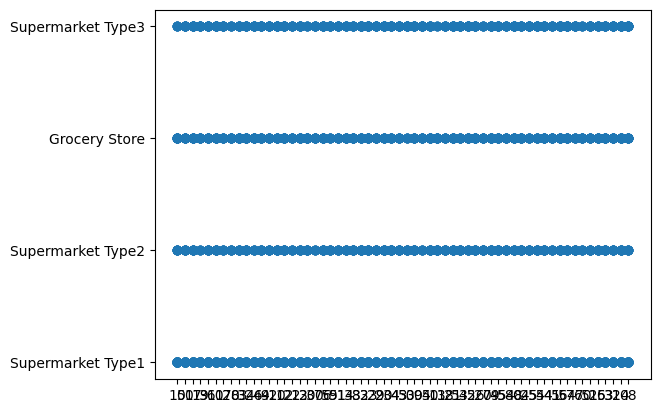

In [5]:
train_data['X1_numbers']=train_data['X1'].str[3:]
print(train_data['X1_numbers'].unique())
plt.scatter(x=train_data['X1_numbers'],y=train_data['X11'])

In [ ]:
import seaborn as sns
sns.boxplot(X_train['X4'])

In [106]:
print(train_data['X5'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


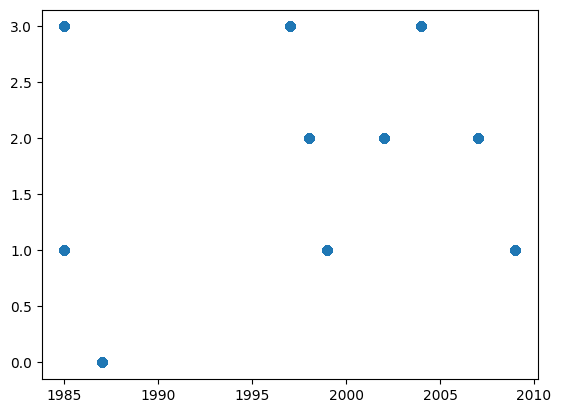

In [109]:
from sklearn.preprocessing import LabelEncoder
train_data['X9'] = train_data['X9'].fillna('Missing')
le = LabelEncoder()
train_data['X9'] = le.fit_transform(train_data['X9'])


plt.scatter(x=train_data['X8'],y=train_data['X9'])

In [110]:
test_data=pd.read_csv('test.csv')

In [111]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2523 non-null   object 
 1   X2      2066 non-null   float64
 2   X3      2523 non-null   object 
 3   X4      2523 non-null   float64
 4   X5      2523 non-null   object 
 5   X6      2523 non-null   float64
 6   X7      2523 non-null   object 
 7   X8      2523 non-null   int64  
 8   X9      1824 non-null   object 
 9   X10     2523 non-null   object 
 10  X11     2523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 216.9+ KB


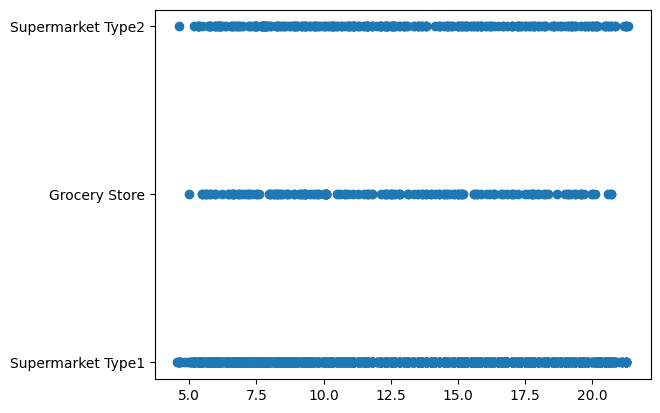

In [120]:
plt.scatter(x=test_data['X2'],y=test_data['X11'])

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import boxcox
from sklearn.metrics import mean_absolute_error

# Load the data
train_data = pd.read_csv('train.csv')

# Split data into features and target variable
X = train_data.drop(columns='Y')
y = train_data['Y']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=48)

# X1: Encoding categorical column (first two characters)



X_train['X1'] = X_train['X1'].str[:2]
X_val['X1'] = X_val['X1'].str[:2]

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

X_train['X1']=label.fit_transform(X_train['X1'])
X_val['X1']=label.transform(X_val['X1'])

'''
X_train_encoded_df = pd.get_dummies(X_train, columns=['X1'], drop_first=False)
X_val_encoded_df = pd.get_dummies(X_val, columns=['X1'], drop_first=False)
X_train, X_val = X_train_encoded_df.align(X_val_encoded_df, join='left', axis=1, fill_value=0)
'''
# X2: Imputation for numerical column
X2_imputer = SimpleImputer(strategy='median')
X_train['X2'] = X2_imputer.fit_transform(X_train[['X2']])
X_val['X2'] = X2_imputer.transform(X_val[['X2']])

# X3: Drop the column
X_train=X_train.drop(columns='X3')
X_val=X_val.drop(columns='X3')


# X4: Box-Cox transformation

X_train['X4'], _ = boxcox(X_train['X4'] + 1)
X_val['X4'], _ = boxcox(X_val['X4'] + 1)

X_train['X4']=X_train['X4'].replace('0',X_train['X4'].mean())
X_val['X4']=X_val['X4'].replace('0',X_val['X4'].mean())


# X5: Encoding categorical column
'''
le=LabelEncoder()
X_train['X5']=le.fit_transform(X_train['X5'])
X_val['X5']=le.transform(X_val['X5'])
'''
import pandas as pd

# Assuming your dataframe is df and the column with these unique values is 'X5'
def categorize_x5(value):
    # Define the groups
    food_items = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods', 'Snack Foods', 
                  'Frozen Foods', 'Breakfast', 'Canned', 'Breads', 
                  'Starchy Foods', 'Seafood']
    drinks_and_dairy = ['Soft Drinks', 'Hard Drinks']
    others = ['Household', 'Others','Health and Hygiene']
    
    # Categorize based on the value
    if value in food_items:
        return 'Food Items'
    elif value in drinks_and_dairy:
        return 'Drinks and Dairy'
    elif value in others:
        return 'Other'
    else:
        return 'Unknown'

# Apply the function to 'X5' column to create a new feature
X_train['X5_Category_Group'] = X_train['X5'].apply(categorize_x5)
X_val['X5_Category_Group']=X_val['X5'].apply(categorize_x5)
# View the updated dataframe
print(X_train[['X5', 'X5_Category_Group']].head())

X_train=X_train.drop(columns='X5')
X_val=X_val.drop(columns='X5')




X_train_encoded_df = pd.get_dummies(X_train, columns=['X5_Category_Group'], drop_first=False)
X_val_encoded_df = pd.get_dummies(X_val, columns=['X5_Category_Group'], drop_first=False)
X_train, X_val = X_train_encoded_df.align(X_val_encoded_df, join='left', axis=1, fill_value=0)


'''
X_train_encoded_df = pd.get_dummies(X_train, columns=['X5'], drop_first=False)
X_val_encoded_df = pd.get_dummies(X_val, columns=['X5'], drop_first=False)
X_train, X_val = X_train_encoded_df.align(X_val_encoded_df, join='left', axis=1, fill_value=0)
'''
# X6: (You haven't provided transformation, so keep it unchanged or add appropriate handling here)
'''
X_train['price_per_weight']=X_train['X6']/X_train['X2']
X_val['price_per_weight']=X_val['X6']/X_val['X2']
'''
'''
X_train=X_train.drop(columns='X2')
X_val=X_val.drop(columns='X2')
'''


# X7: Encoding categorical column
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
X_train['X7']=le3.fit_transform(X_train['X7'])
X_val['X7']=le3.transform(X_val['X7'])
'''
X_train_encoded_df = pd.get_dummies(X_train, columns=['X7'], drop_first=False)
X_val_encoded_df = pd.get_dummies(X_val, columns=['X7'], drop_first=False)
X_train, X_val = X_train_encoded_df.align(X_val_encoded_df, join='left', axis=1, fill_value=0)
'''
# X8: Drop the column
X_train = X_train.drop(columns='X8')
X_val = X_val.drop(columns='X8')



# X9: Handle missing values and label encoding
X_train['X9'] = X_train['X9'].fillna('Missing')
X_val['X9'] = X_val['X9'].fillna('Missing')
le = LabelEncoder()
X_train['X9'] = le.fit_transform(X_train['X9'])
X_val['X9'] = le.transform(X_val['X9'])


X_train['X7_X9']=X_train['X7']*X_train['X9']
X_val['X7_X9']=X_val['X7']*X_val['X9']
'''
X_train=X_train.drop(columns='X7')
X_val=X_val.drop(columns='X7')
'''

X_train=X_train.drop(columns='X9')
X_val=X_val.drop(columns='X9')

# X10: Label Encoding
'''
X_train_encoded_df = pd.get_dummies(X_train, columns=['X10'], drop_first=False)
X_val_encoded_df = pd.get_dummies(X_val, columns=['X10'], drop_first=False)
X_train, X_val = X_train_encoded_df.align(X_val_encoded_df, join='left', axis=1, fill_value=0)
'''
X10_encoder = LabelEncoder()
X_train['X10'] = X10_encoder.fit_transform(X_train['X10'])
X_val['X10'] = X10_encoder.transform(X_val['X10'])

# X11: Encoding categorical column
'''
X11_encoder = LabelEncoder()
X_train['X11'] = X11_encoder.fit_transform(X_train['X11'])
X_val['X11'] = X11_encoder.transform(X_val['X11'])
'''
X_train_encoded_df = pd.get_dummies(X_train, columns=['X11'], drop_first=False)
X_val_encoded_df = pd.get_dummies(X_val, columns=['X11'], drop_first=False)
X_train, X_val = X_train_encoded_df.align(X_val_encoded_df, join='left', axis=1, fill_value=0)


from sklearn.preprocessing import MinMaxScaler


# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100,min_samples_leaf=4,max_depth=10, random_state=42)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math
rf_model.fit(X_train,y_train)

predictions=rf_model.predict(X_val_scaled)

mae=mean_absolute_error(predictions,y_val)

print(mae)
rand_forest_mse = mean_squared_error(y_val ,predictions)
rand_forest_rmse = math.sqrt(rand_forest_mse)
rand_forest_r2 = r2_score(y_val, predictions)

print('RandomForest RMSE  \t       ----> {}'.format(rand_forest_rmse))
print('RandomForest R2 Score       ----> {}'.format(rand_forest_r2))


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
degree = 2  # You can tune this
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit the model
poly_pipeline.fit(X_train_scaled, y_train)

# Predict
y_pred = poly_pipeline.predict(X_val_scaled)

# Evaluate the performance
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error (MAE) for Polynomial Regression (degree={degree}): {mae}")

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_train_pred = gb_model.predict(X_train_scaled)
y_val_pred = gb_model.predict(X_val_scaled)

train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Training MAE: {train_mae}, R²: {train_r2}")
print(f"Validation MAE: {val_mae}, R²: {val_r2}")


import matplotlib.pyplot as plt
import numpy as np
'''
# Get the feature importances
importances = gb_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()
'''



#{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}

                         X5 X5_Category_Group
5441                   Meat        Food Items
3094            Soft Drinks  Drinks and Dairy
5445          Starchy Foods        Food Items
276   Fruits and Vegetables        Food Items
3910     Health and Hygiene             Other


c:\Users\renad\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1.6970195846865557
RandomForest RMSE  	       ----> 1.8443074001713693
RandomForest R2 Score       ----> -2.304115595273897
Mean Absolute Error (MAE) for Polynomial Regression (degree=2): 0.38471280678901176
Training MAE: 0.3883717279384144, R²: 0.7565978346486193
Validation MAE: 0.3938664148952616, R²: 0.7496415910317917


'\n# Get the feature importances\nimportances = gb_model.feature_importances_\n\n# Sort the feature importances in descending order\nindices = np.argsort(importances)[::-1]\n\n# Plot the feature importances\nplt.figure(figsize=(10, 6))\nplt.title("Feature Importances")\nplt.barh(range(X_train.shape[1]), importances[indices], align="center")\nplt.yticks(range(X_train.shape[1]), X_train.columns[indices])\nplt.xlabel("Relative Importance")\nplt.show()\n'

In [21]:
import seaborn as sns
sns.boxplot(X_train_scaled['X4'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [22]:
import numpy as np

# Replace 0s with random values sampled from the non-zero values
X_train_cleaned = X_train.copy()

# Sample from non-zero values
non_zero_values = X_train_cleaned[X_train_cleaned['X4'] > 0]['X4']

# Replace 0 values with random values from the non-zero values
X_train_cleaned['X4'] = X_train_cleaned['X4'].replace(0, 
                                                     np.random.choice(non_zero_values, size=(X_train_cleaned['X4'] == 0).sum()))

# Check if it worked
print(X_train_cleaned['X4'].describe())


TypeError: Invalid "to_replace" type: 'int'

0


ValueError: x and y must be the same size

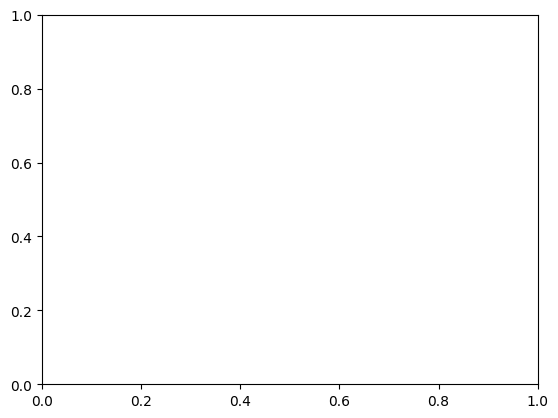

In [5]:
print(X_train['X2'].isnull().sum())
plt.scatter(x=X_train['X2'],y=y)

In [ ]:
train_data['X2']


(array([1935.,    0.,    0., 1711.,    0.,    0.,  672.,    0.,    0.,
        1682.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

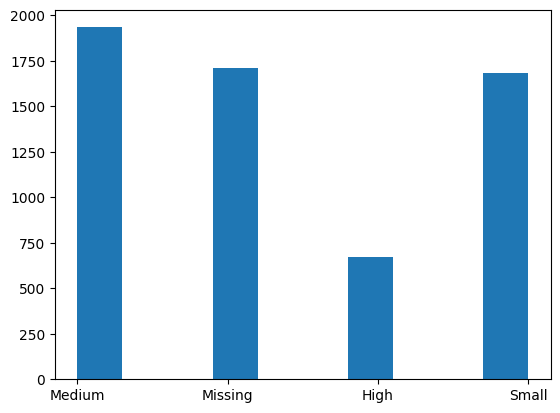

In [81]:
train_data['X9']=train_data['X9'].fillna('Missing')
plt.hist(train_data['X9'])

(array([1650.,    0.,    0.,    0.,    0., 2358.,    0.,    0.,    0.,
        1992.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

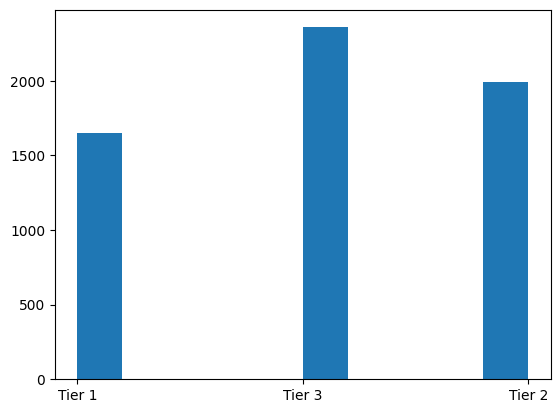

In [82]:
plt.hist(train_data['X10'])

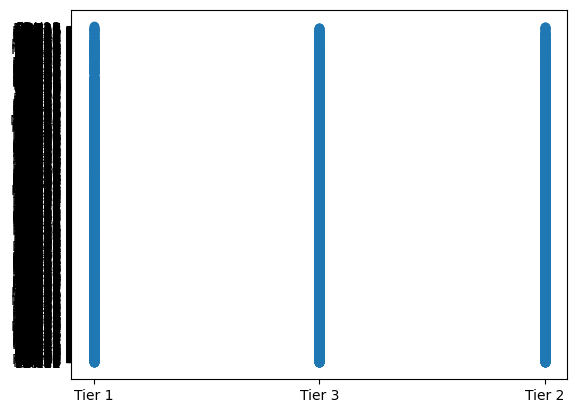

In [92]:
plt.scatter(x=train_data['X10'],y=train_data['X1'])

In [96]:

import numpy as np
train_data['Y_log'] = np.log1p(train_data['Y'])
from scipy.stats import boxcox

print(train_data['Y_log'].skew())
train_data['Y_boxcox'],_= boxcox(train_data['Y'] + 1) 
print(train_data['Y_boxcox'].skew())


-1.304107032942184
-0.12086403075839273


(array([1852., 1622., 1108.,  701.,  426.,  194.,   39.,   26.,   21.,
          11.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <BarContainer object of 10 artists>)

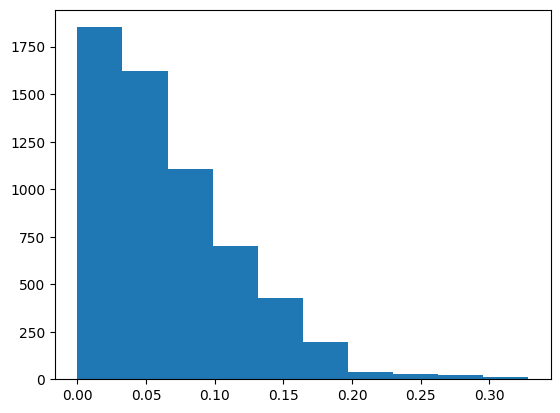

In [55]:
plt.hist(train_data['X4'])

1.1609302899077907


(array([1598., 1580., 1150.,  721.,  535.,  287.,   60.,   33.,   19.,
          17.]),
 array([0.        , 0.02839684, 0.05679368, 0.08519052, 0.11358736,
        0.1419842 , 0.17038104, 0.19877788, 0.22717472, 0.25557156,
        0.2839684 ]),
 <BarContainer object of 10 artists>)

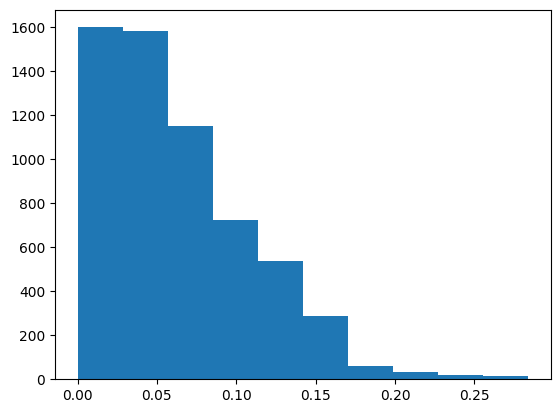

In [ ]:
print(train_data['X4'].skew())
import numpy as np
train_data['X4_log'] = np.log1p(train_data['X4'])
plt.hist(train_data['X4_log'])



In [60]:
from scipy.stats import boxcox
train_data['X4_boxcox'],_= boxcox(train_data['X4'] + 1) 

(array([659., 408., 719., 884., 562., 757., 841., 352., 405., 413.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <BarContainer object of 10 artists>)

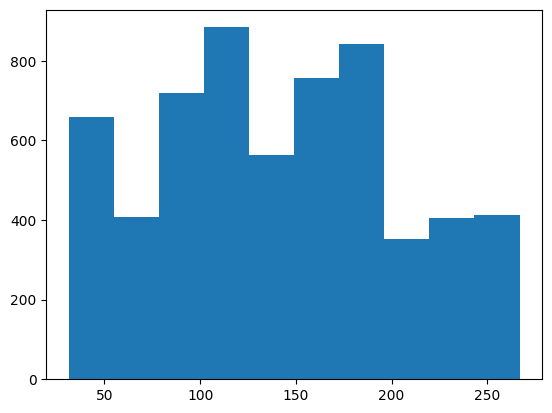

In [65]:
plt.hist(train_data['X6'])

(array([ 180.,  306.,  330.,  163.,  450.,  800.,  696., 1139., 1056.,
         880.]),
 array([3.47475758, 3.68633887, 3.89792016, 4.10950145, 4.32108274,
        4.53266403, 4.74424532, 4.95582661, 5.1674079 , 5.37898919,
        5.59057048]),
 <BarContainer object of 10 artists>)

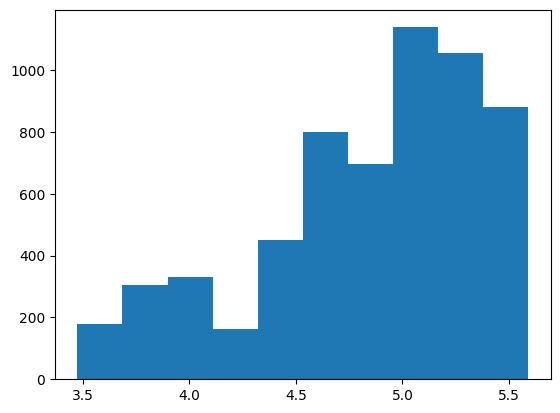

In [68]:
train_data['X6_log'] = np.log1p(train_data['X6'])
plt.hist(train_data['X6_log'])

In [69]:
print(train_data['X6_log'].skew())

-0.7224081423625599


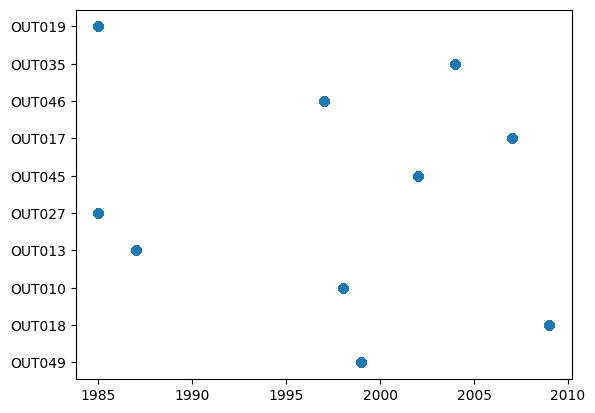

In [72]:
plt.scatter(x=train_data['X8'],y=train_data['X7'])

In [76]:
from sklearn.impute import SimpleImputer
X9_imputer=SimpleImputer(strategy='most_frequent')
train_data['X9']=X9_imputer.fit_transform(train_data[['X9']]).ravel()


(array([3646.,    0.,    0.,    0.,    0.,  672.,    0.,    0.,    0.,
        1682.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

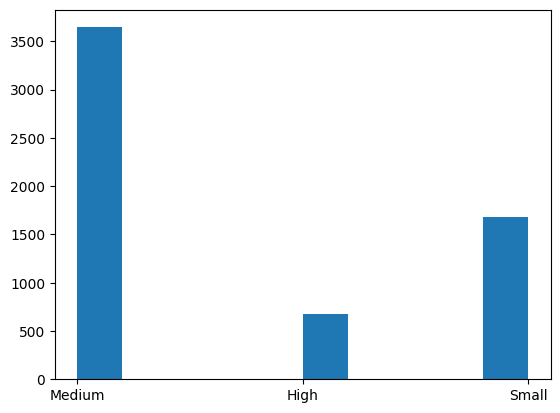

In [77]:
plt.hist(train_data['X9'])

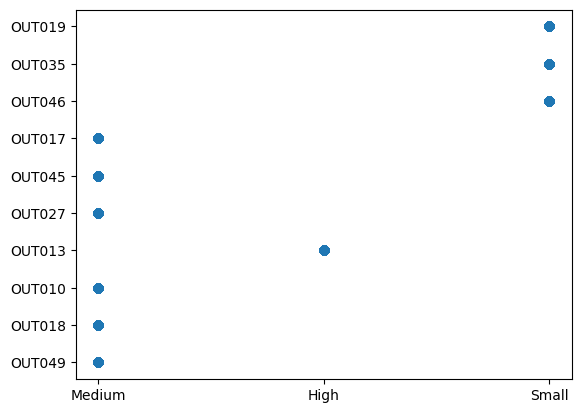

In [78]:
plt.scatter(x=train_data['X9'],y=train_data['X7'])

In [66]:
print(train_data['X6'].skew())

0.12329787340034788


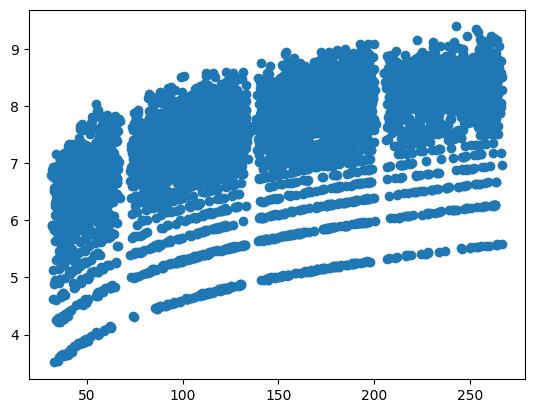

In [67]:
plt.scatter(x=train_data['X6'],y=train_data['Y'])


In [62]:
print(train_data['X4_boxcox'].skew())

0.12169094433281628


(array([558., 684., 934., 792., 812., 752., 639., 543., 220.,  66.]),
 array([0.        , 0.01061975, 0.0212395 , 0.03185925, 0.042479  ,
        0.05309875, 0.0637185 , 0.07433824, 0.08495799, 0.09557774,
        0.10619749]),
 <BarContainer object of 10 artists>)

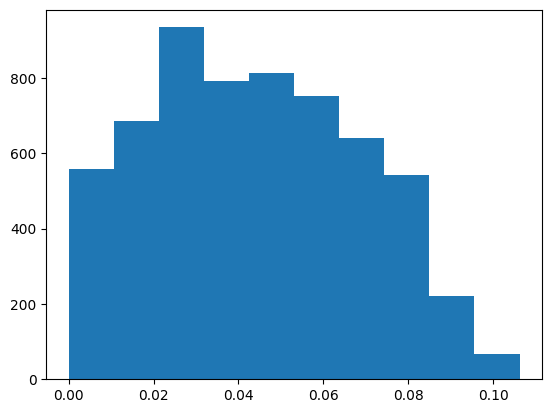

In [63]:
plt.hist(train_data['X4_boxcox'])

<Axes: ylabel='X4_boxcox'>

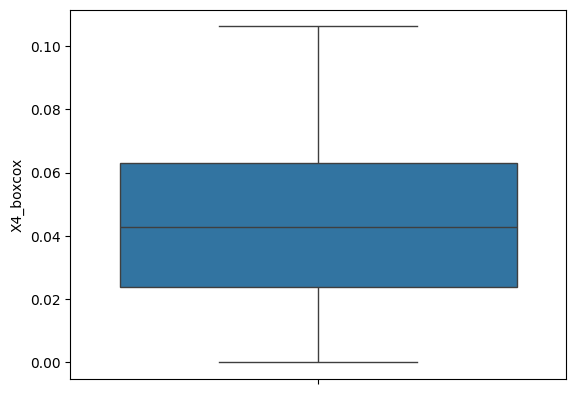

In [64]:
import seaborn as sns
sns.boxplot(train_data['X4_boxcox'] )

In [58]:
print(train_data['X4_log'].skew())

1.0075377793051994


(array([659., 408., 719., 884., 562., 757., 841., 352., 405., 413.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <BarContainer object of 10 artists>)

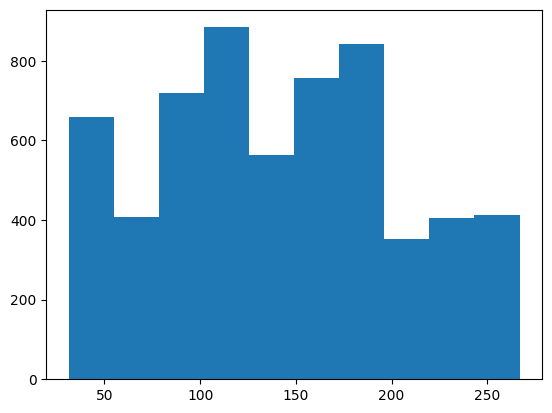

In [5]:
plt.hist(train_data['X6'])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split X1 into letters and numeric parts
train_data['X1_letters'] = train_data['X1'].str[:2]  # Extract first three characters


# Encode the categorical part
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
train_data['X1_letters_encoded'] = encoder.fit_transform(train_data[['X1_letters']])

# Multiply the encoded letters and numeric parts
train_data['X1_combined'] = train_data['X1_letters_encoded'] * train_data['X1_numbers']

# 1. Plot the numeric part of X1 against the price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['X1_numbers'], y=train_data['Y'], alpha=0.6)
plt.title("Numeric Part of X1 vs Price")
plt.xlabel("X1 Numbers")
plt.ylabel("Price")
plt.show()

# 2. Plot the categorical part (letters) against the price
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_data['X1_numbers'], y=train_data['Y'])
plt.xticks(rotation=45)
plt.title("numerical Part of X1 vs Price")
plt.xlabel("X1 numbers")
plt.ylabel("Price")
plt.show()

# 3. Plot the combined encoding of X1 against the price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['X1_combined'], y=train_data['Y'], alpha=0.6)
plt.title("Combined Encoding of X1 (Letters * Numbers) vs Price")
plt.xlabel("X1 Combined")
plt.ylabel("Price")
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

In [51]:
X_train=train_data.drop(columns='Y')
from sklearn.impute import SimpleImputer
X2_imputer=SimpleImputer(strategy='mode')
X_train['X2']=X2_imputer.fit_transform(X_train[['X2']])




InvalidParameterError: The 'strategy' parameter of SimpleImputer must be a str among {'most_frequent', 'median', 'constant', 'mean'} or a callable. Got 'mode' instead.

(array([558., 684., 934., 792., 812., 752., 639., 543., 220.,  66.]),
 array([-1.74899819, -1.32350627, -0.89801434, -0.47252241, -0.04703049,
         0.37846144,  0.80395337,  1.22944529,  1.65493722,  2.08042915,
         2.50592107]),
 <BarContainer object of 10 artists>)

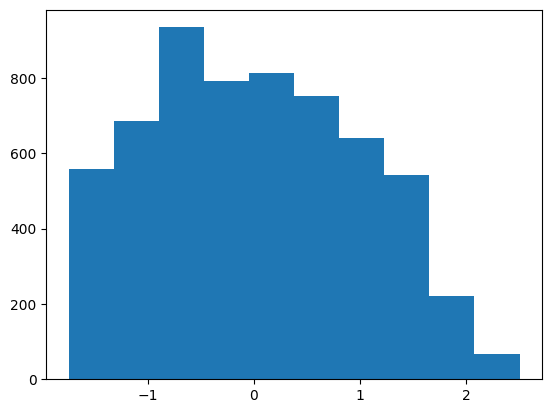

In [52]:
plt.hist(X_train['X4'])

(array([ 327.,  611.,  600.,  463.,  538., 1446.,  537.,  537.,  508.,
         433.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

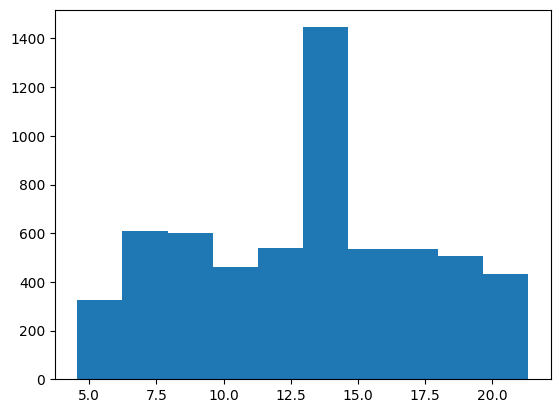

In [50]:
plt.hist(X_train['X2'])

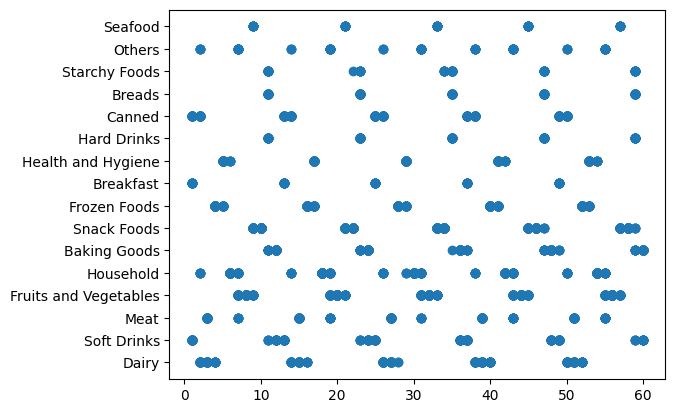

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=train_data['X1_numbers'],y=train_data['X5'])

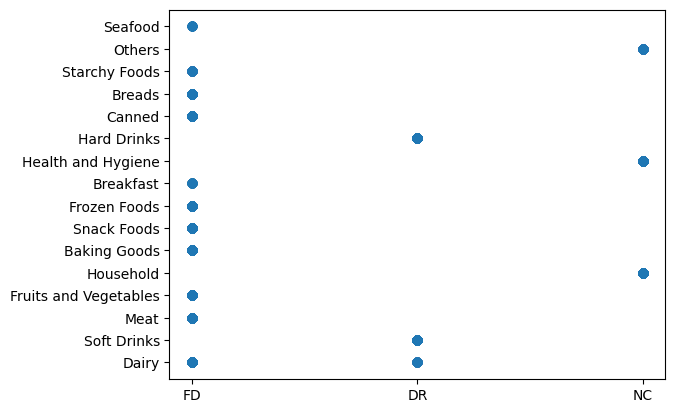

In [8]:
plt.scatter(x=train_data['X1_letters'],y=train_data['X5'])

In [9]:
train_data['product_type'] = train_data['X1'].apply(lambda x: 'Food' if x[:2] == 'FD' else ('Drink/Dairy' if x[:2] == 'DR' else 'Other'))

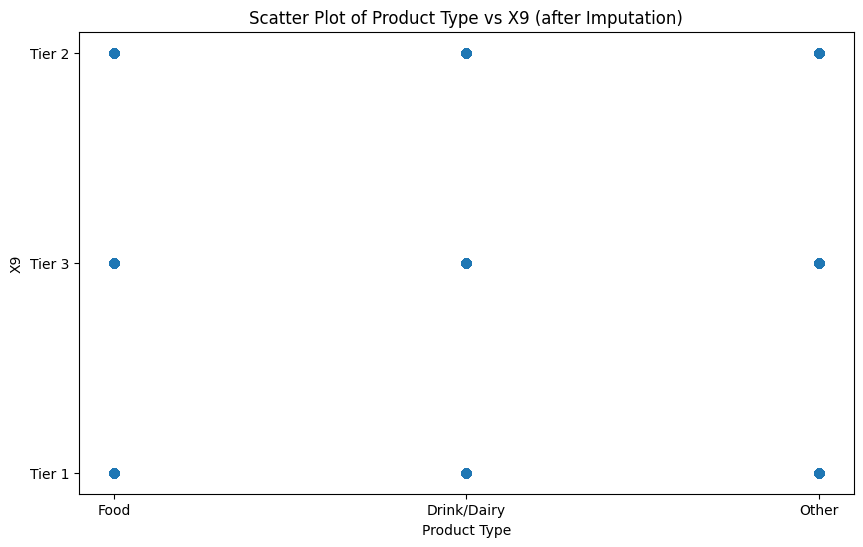

In [10]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming 'product_type' and 'X9' are already defined in train_data
# Using SimpleImputer to fill missing values in X9 with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X=train_data
X['X9']=imputer.fit_transform(X[['X9']]).ravel()


# Scatter plot of product_type vs X9
plt.figure(figsize=(10, 6))
plt.scatter(train_data['product_type'], X['X10'], alpha=0.5)
plt.title("Scatter Plot of Product Type vs X9 (after Imputation)")
plt.xlabel('Product Type')
plt.ylabel('X9')
plt.show()


In [11]:
correlation = train_data['X1_combined'].corr(train_data['Y'])
print(f"Correlation between X1_combined and Price: {correlation}")


Correlation between X1_combined and Price: 0.024992274741458712


In [12]:
spearman_corr = train_data['X1_combined'].corr(train_data['Y'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")


Spearman Correlation: 0.030277233065059105


In [13]:
correlation = train_data['X1_combined'].corr(train_data['Y'])
print(f"Correlation between X1_combined and Price: {correlation}")


Correlation between X1_combined and Price: 0.024992274741458712


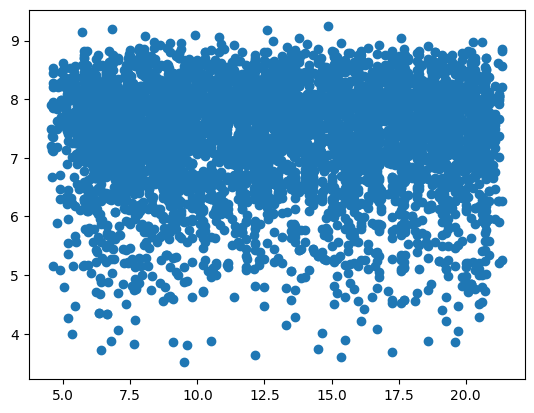

In [14]:
plt.scatter(x=train_data['X2'],y=train_data['Y'])

plt.show()

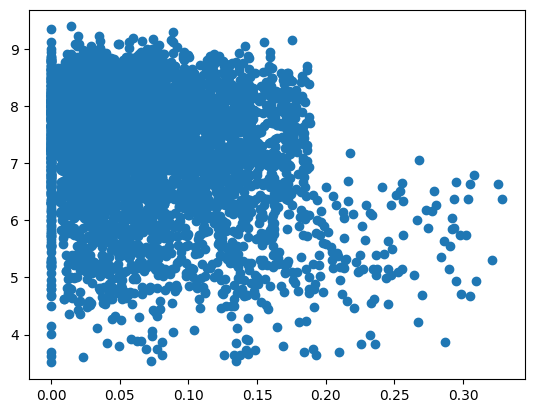

In [15]:
plt.scatter(x=train_data['X4'],y=train_data['Y'])




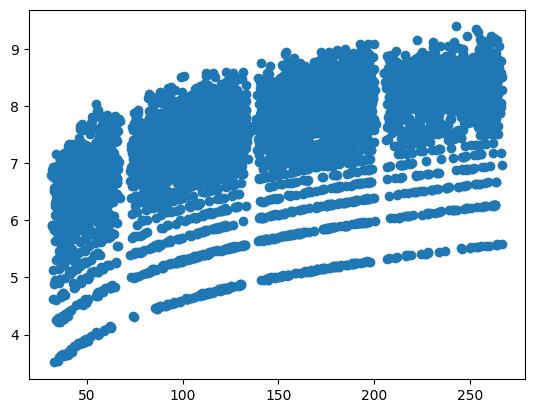

In [16]:
plt.scatter(x=train_data['X6'],y=train_data['Y'])

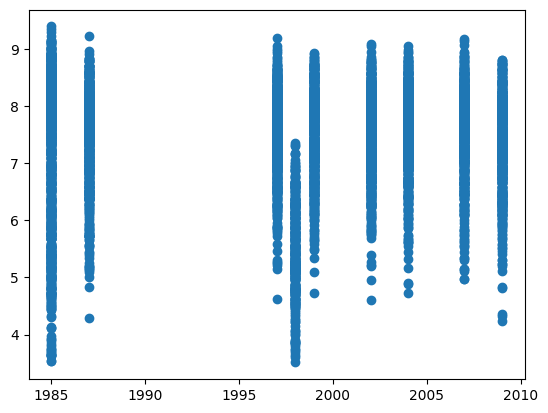

In [17]:
plt.scatter(x=train_data['X8'],y=train_data['Y'])

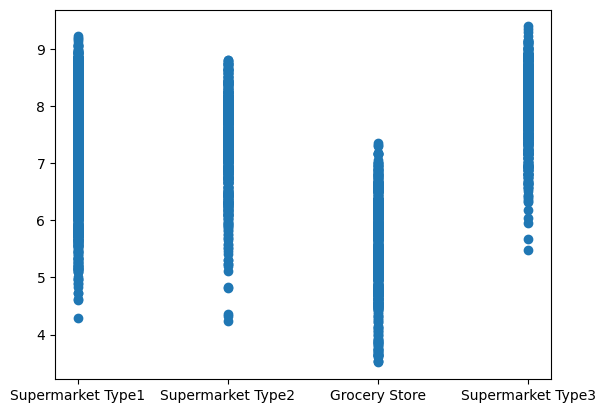

In [18]:
plt.scatter(x=train_data['X11'],y=train_data['Y'])

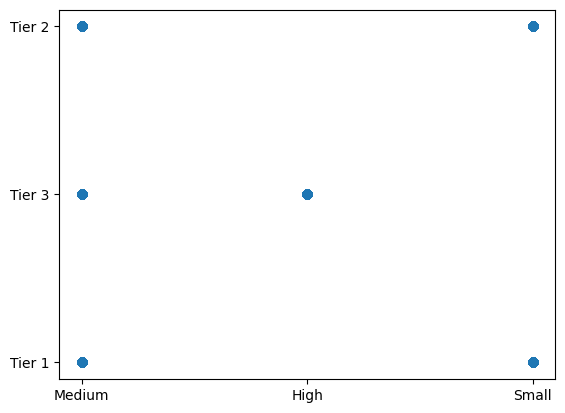

In [19]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="most_frequent")
imputer.fit_transform(train_data[['X9']])

plt.scatter(x=train_data['X9'],y=train_data['X10'])

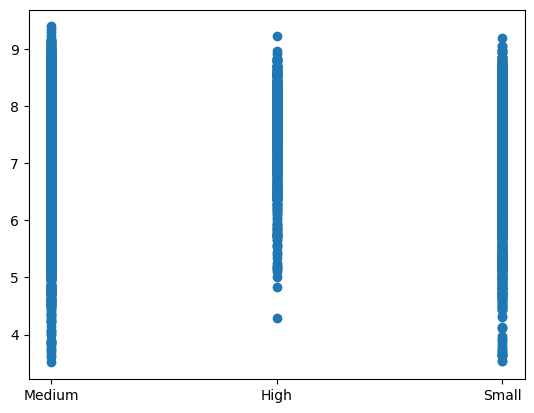

In [20]:
plt.scatter(x=train_data['X9'],y=train_data['Y'])

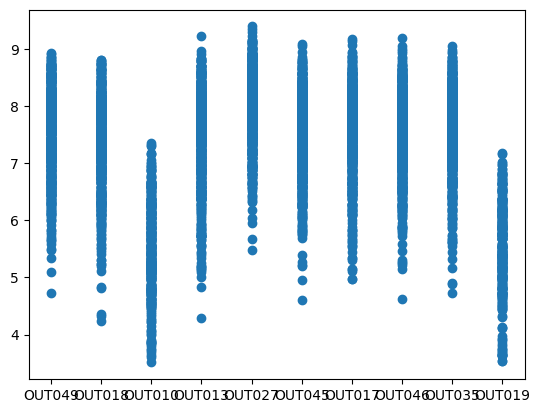

In [21]:
plt.scatter(x=train_data['X7'],y=train_data['Y'])

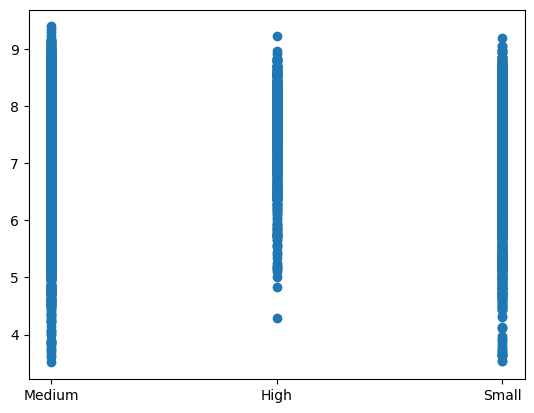

In [22]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
train_data[['X9']]=imputer.fit_transform(train_data[['X9']])
plt.scatter(x=train_data['X9'],y=train_data['Y'])

In [23]:
train_data['X5'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

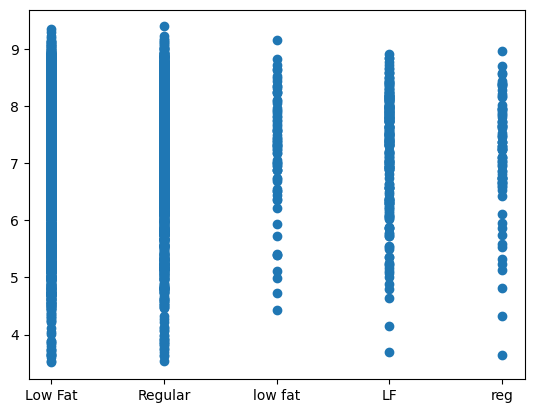

In [24]:
plt.scatter(x=train_data['X3'],y=train_data['Y'])

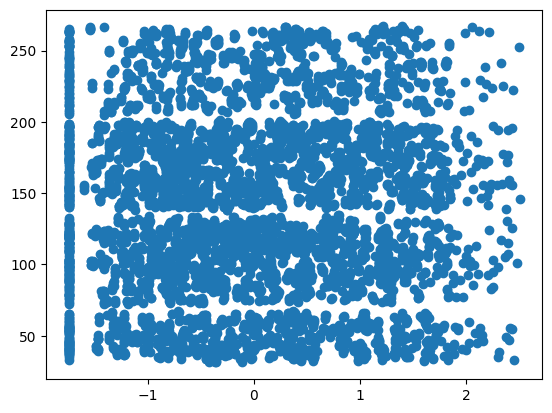

In [25]:
X1=train_data['X1']
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
X4 = train_data['X4']
transformer = PowerTransformer()
X4_transformed = transformer.fit_transform(X4.values.reshape(-1, 1))
X4_zscore = zscore(X4_transformed)
valid_rows = X4_zscore < 3
train_data['X4'] = X4_transformed[valid_rows]
X = train_data[valid_rows]
X1=X1.str.extract('(\d+)',expand=False).astype(int)
plt.scatter(x=X4_transformed,y=train_data['X6'])

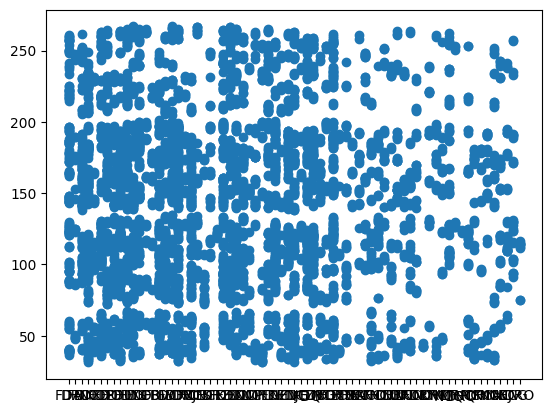

In [26]:
X1_alpha=train_data['X1'].str.extract(r'([a-zA-Z]+)').astype(object)
plt.scatter(x=X1_alpha[0],y=train_data['X6'])

In [27]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


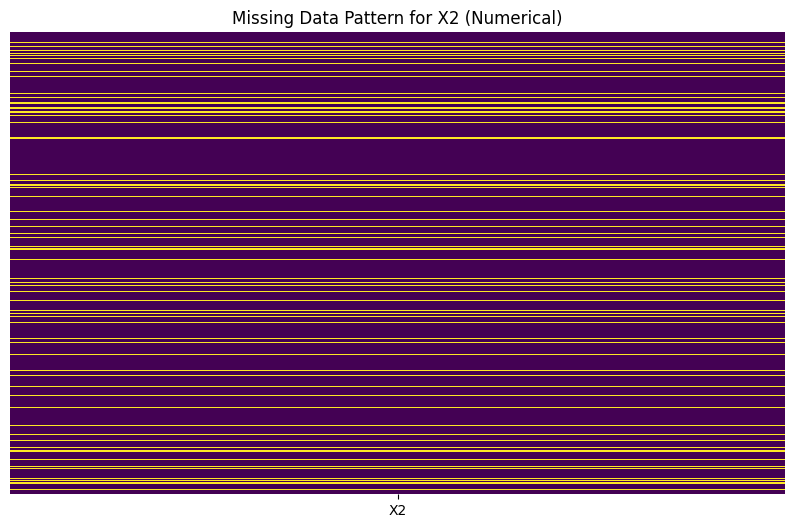

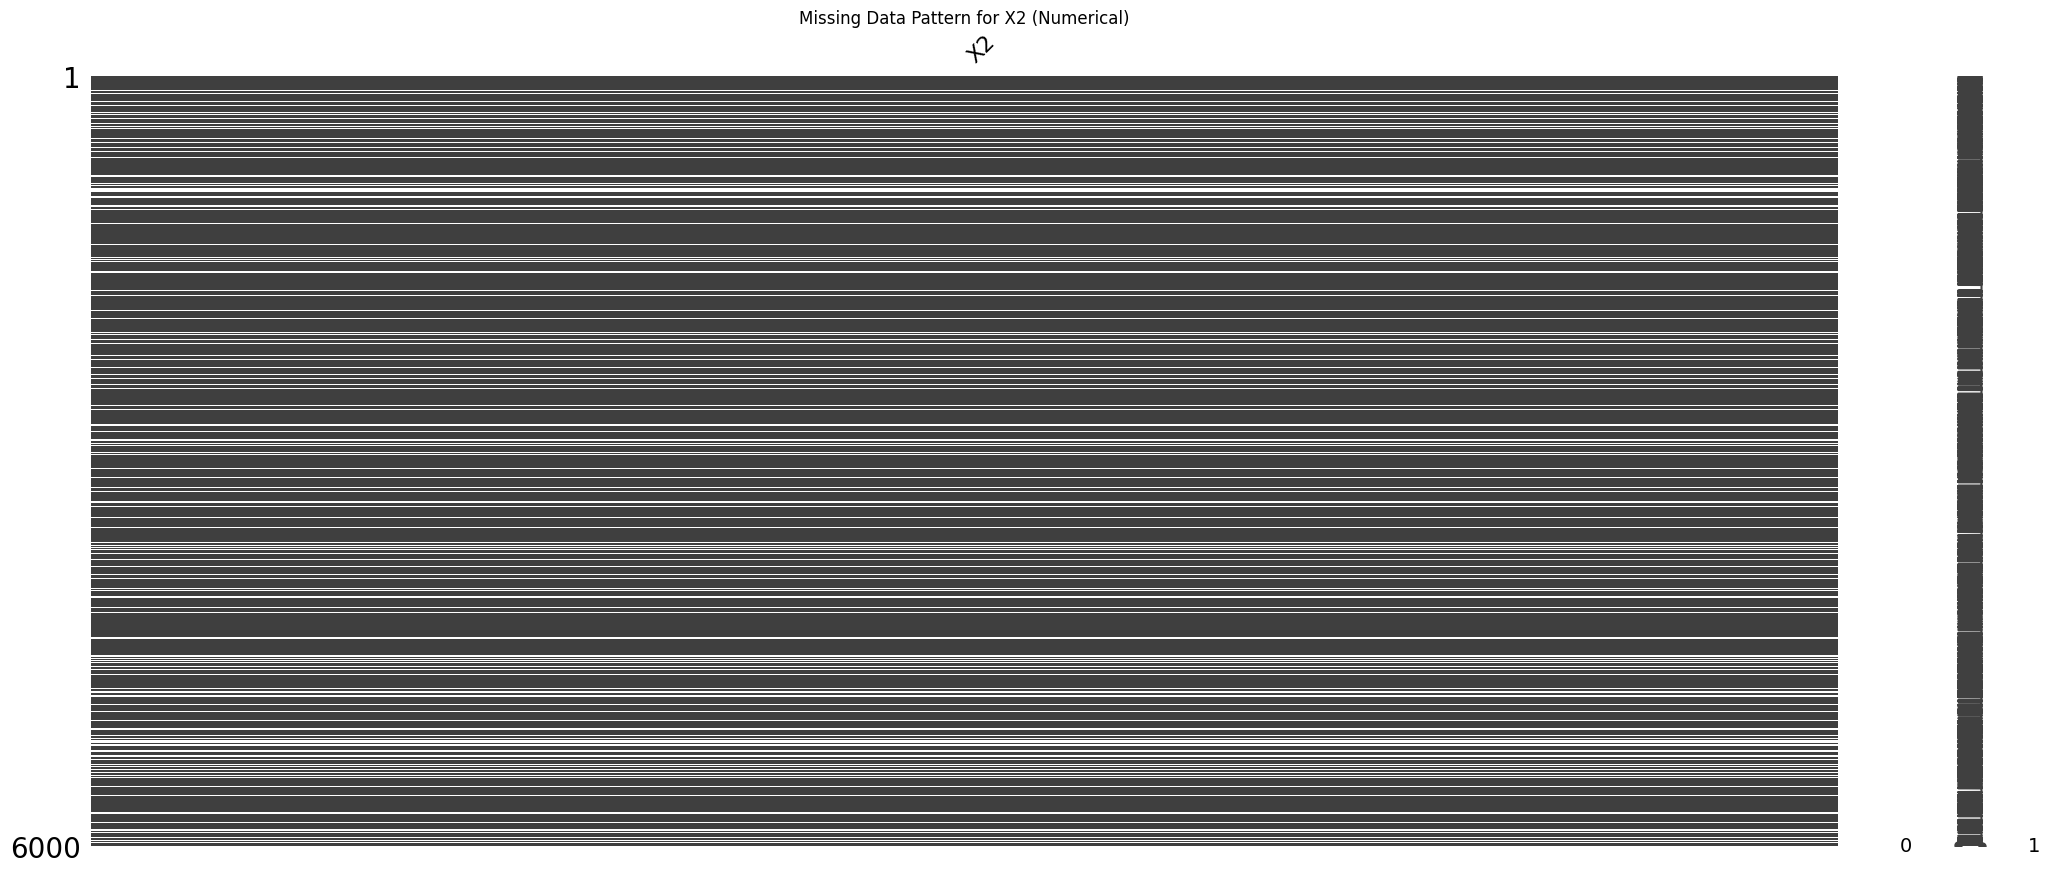

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize missing data for X2
plt.figure(figsize=(10, 6))
sns.heatmap(train_data[['X2']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Pattern for X2 (Numerical)")
plt.show()
import missingno as msno

# Visualize missing data pattern for X2 using missingno
msno.matrix(train_data[['X2']])
plt.title("Missing Data Pattern for X2 (Numerical)")
plt.show()


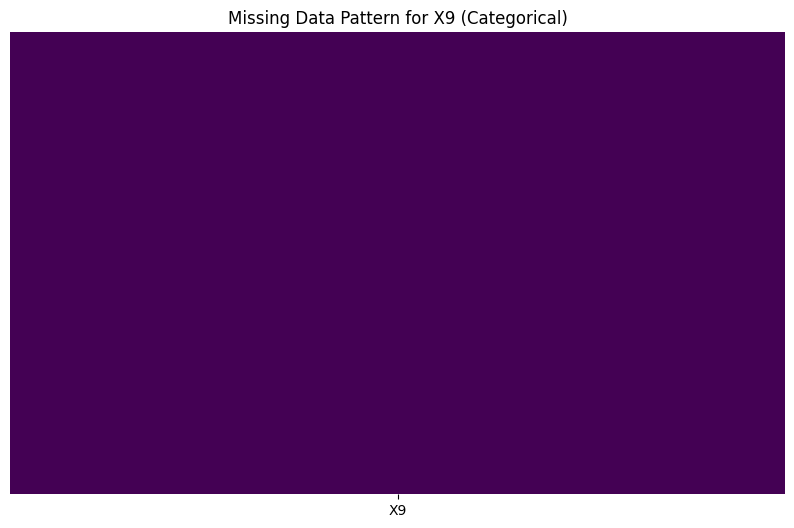

In [29]:
# Visualize missing data for X9
plt.figure(figsize=(10, 6))
sns.heatmap(train_data[['X9']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Pattern for X9 (Categorical)")
plt.show()


In [30]:
X['X1']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
5995    FDB32
5996    FDJ16
5997    FDJ32
5998    FDO12
5999    NCB18
Name: X1, Length: 6000, dtype: object

In [31]:
X['X1_letters']=X['X1'].str[:3]
X['X1_numbers']=X['X1'].str[3:].astype(int)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X['X1_letters']=le.fit_transform(X['X1_letters'])

In [32]:
X['X1_letters'].unique()

X['new_feature']=X['X1_letters']*X['X1_numbers']

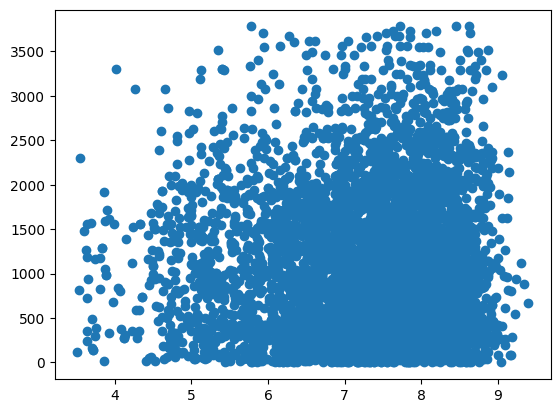

In [33]:
plt.scatter(x=train_data['Y'],y=X['new_feature'])

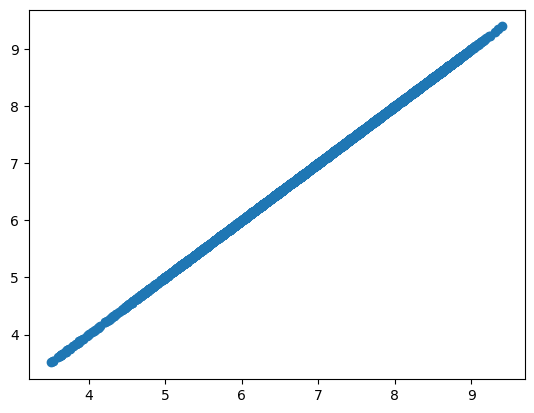

In [34]:
plt.scatter(x=train_data['Y'],y=train_data['Y'])

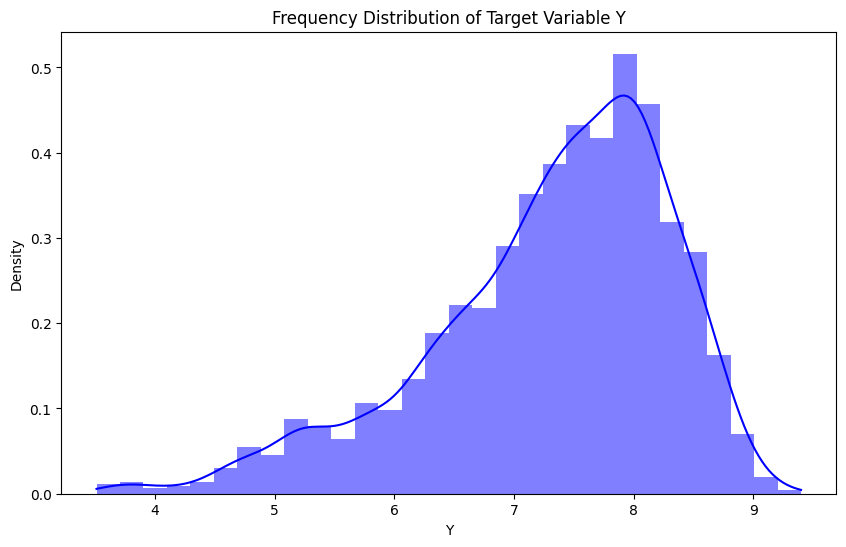

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_data' is your DataFrame and 'Y' is the target variable
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(train_data['Y'], kde=True, bins=30, color='blue', stat='density', linewidth=0)

# Adding title and labels
plt.title('Frequency Distribution of Target Variable Y')
plt.xlabel('Y')
plt.ylabel('Density')

plt.show()


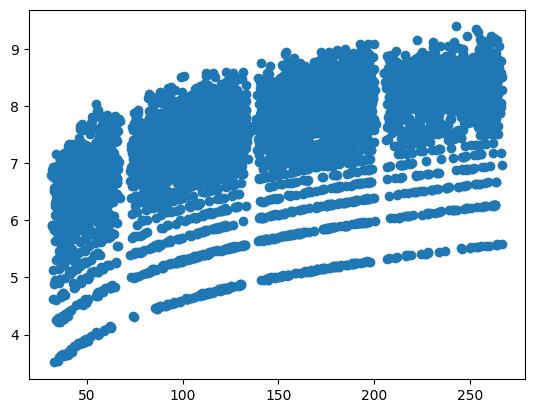

In [36]:
plt.scatter(x=X['X6'],y=train_data['Y'])

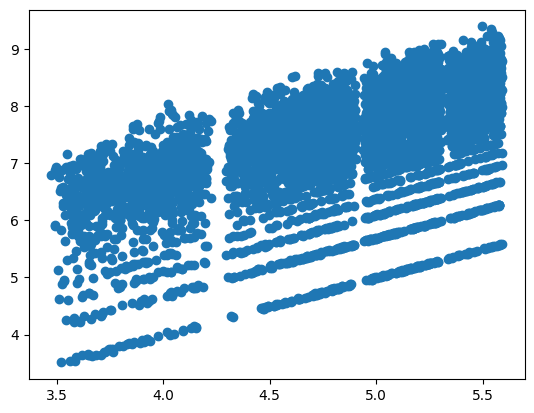

In [37]:
X['X6']=np.log1p(X['X6'])

plt.scatter(x=X['X6'],y=train_data['Y'])

In [38]:
X=train_data.drop(columns='Y')

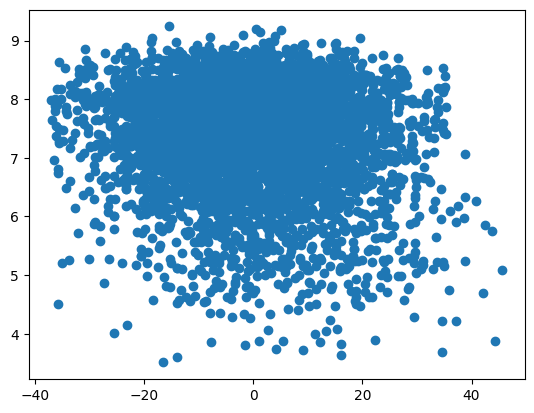

In [39]:
plt.scatter(x=X['X2']*X['X4'],y=train_data['Y'])

(array([  89.,  242.,  580., 1124., 1213.,  922.,  502.,  230.,   81.,
          11.]),
 array([-37.07876173, -28.81135367, -20.54394561, -12.27653756,
         -4.0091295 ,   4.25827855,  12.52568661,  20.79309466,
         29.06050272,  37.32791077,  45.59531883]),
 <BarContainer object of 10 artists>)

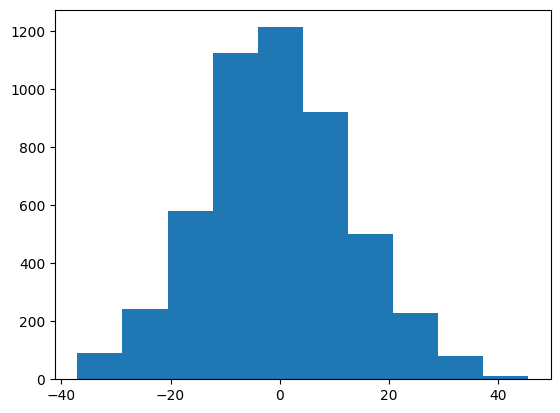

In [40]:
import seaborn as sns
plt.hist(x=X['X2']*X['X4'])

(array([659., 408., 719., 884., 562., 757., 841., 352., 405., 413.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <BarContainer object of 10 artists>)

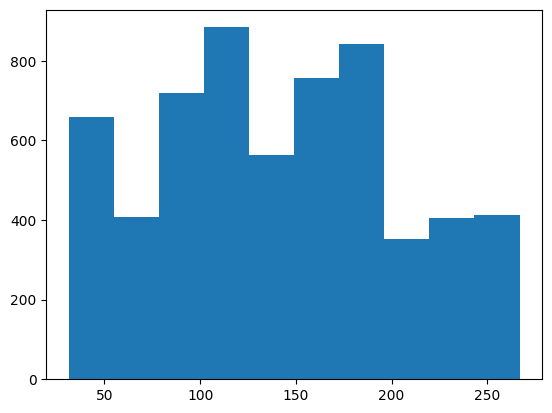

In [41]:
plt.hist(X['X6'])

(array([638., 616., 922., 881., 806., 772., 565., 363., 318., 119.]),
 array([ 115.4439  ,  345.715266,  575.986632,  806.257998, 1036.529364,
        1266.80073 , 1497.072096, 1727.343462, 1957.614828, 2187.886194,
        2418.15756 ]),
 <BarContainer object of 10 artists>)

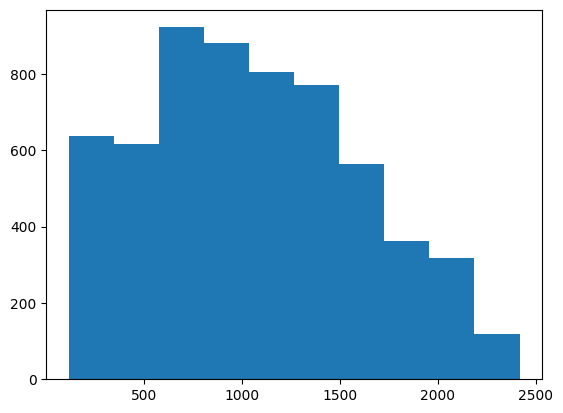

In [42]:
plt.hist(X['X6']*train_data['Y'])


In [43]:
# Analyze correlation between X6 and the target variable Y
correlation_X6_Y = train_data['X6'].corr(train_data['Y'])
print(f"Correlation between X6 and target variable Y: {correlation_X6_Y}")


Correlation between X6 and target variable Y: 0.5193609038155383


In [44]:
# Analyze correlation between X6 and the target variable Y
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
X['X2']=imputer.fit_transform(X[['X2']])
correlation_X6_Y = train_data['X2'].corr(train_data['Y'])
print(f"Correlation between X6 and target variable Y: {correlation_X6_Y}")


Correlation between X6 and target variable Y: 0.00711247972269688


In [45]:
print(X['X2'].value_counts(normalize=True))

X2
12.956536    0.167667
17.600000    0.010833
12.150000    0.010667
11.800000    0.008833
13.650000    0.008333
               ...   
5.325000     0.000167
6.325000     0.000167
6.440000     0.000167
7.275000     0.000167
6.895000     0.000167
Name: proportion, Length: 411, dtype: float64


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `train_data` is your DataFrame and it has already been loaded.

# 1. Log-transform the 'X4' feature
train_data['X4_transformed'] = np.log1p(train_data['X4'])  # log(x + 1)

# 2. Calculate the correlation matrix for all features with respect to the target variable 'Y'
correlation_matrix = train_data['X4_transformed'].corr()

# 3. Display the correlation between 'X4_transformed' and the target variable 'Y'
print("Correlation between transformed X4 and target Y:", correlation_matrix['Y']['X4_transformed'])

# 4. Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 5. Plot a scatter plot to visualize the relationship between 'X4_transformed' and 'Y'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data['X4_transformed'], y=train_data['Y'])
plt.title('Scatter plot of X4_transformed vs Y')
plt.xlabel('X4_transformed')
plt.ylabel('Y')
plt.show()


c:\Users\renad\anaconda3\envs\AI\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


TypeError: Series.corr() missing 1 required positional argument: 'other'

In [ ]:
import pandas as pd
import numpy as np

# Assuming `train_data` is your DataFrame and it has already been loaded.

# 1. Log-transform the 'X4' feature
train_data['X4_transformed'] = np.log1p(train_data['X4'])  # log(x + 1)

# 2. Calculate and print the correlation between 'X4_transformed' and the target variable 'Y'
correlation = train_data['X4_transformed'].corr(train_data['Y'])

print(f"Correlation between transformed X4 and target Y: {correlation}")


Correlation between transformed X4 and target Y: -0.19346147356609422


In [ ]:
print(X['X7'].nunique())

10


In [ ]:
test_data=pd.read_csv('test.csv')

In [ ]:
test_data['X7'].nunique()

10

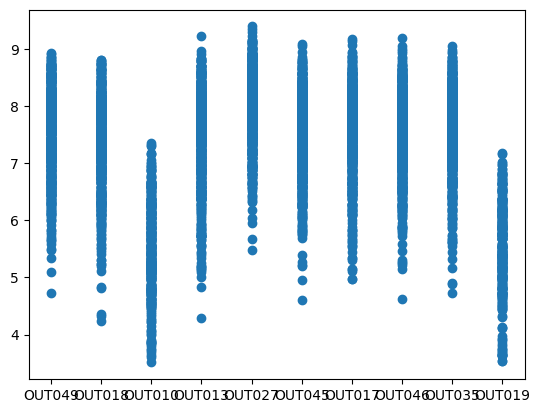

In [ ]:
plt.scatter(x=X['X7'],y=train_data['Y'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = pd.DataFrame(X).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


ValueError: could not convert string to float: 'FDA15'

In [1]:
pip install smote_variants


^C
Note: you may need to restart the kernel to use updated packages.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------------------------- -------------- 0.8/1.2 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/149.9 MB 7.1 MB/s eta 0:00:21
    --------------------------------------- 2.1/149.9 MB 5.9 MB/s eta 0:00:26
    --------------------------------------- 2.1/149.9 MB 5.9 MB/s eta 0:00:26
    --------------------------------------- 2.9/149.9 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 3.9/149.9 MB 3.7 MB/s eta 0:00:40
   - -------------------------------------- 4.5/149.9 MB 3.6 MB/s eta 0:00:41
   - -------------------------------

In [ ]:
correlations = X.corrwith(train_data['Y'])
print(correlations)


ValueError: could not convert string to float: 'FDA15'

In [11]:
train_data['Y'].value_counts()

Y
7.90    48
8.14    44
7.65    42
8.04    41
7.96    41
        ..
4.28     1
4.01     1
4.29     1
4.32     1
4.65     1
Name: count, Length: 508, dtype: int64

(array([1890., 1137.,  902.,  648.,  461.,  402.,  255.,  166.,   53.,
          86.]),
 array([0.01217354, 0.03367515, 0.05517675, 0.07667835, 0.09817996,
        0.11968156, 0.14118317, 0.16268477, 0.18418637, 0.20568798,
        0.22718958]),
 <BarContainer object of 10 artists>)

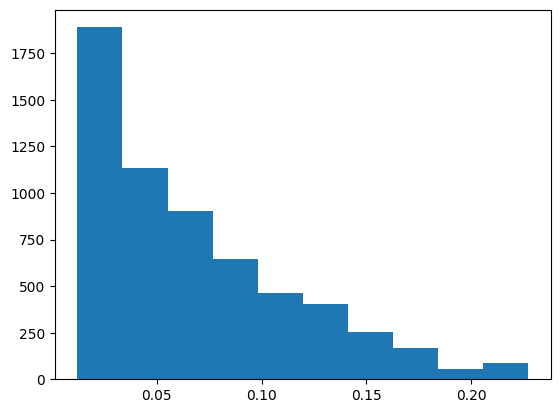

In [16]:
from scipy.stats.mstats import winsorize
train_data['X4'] = winsorize(train_data['X4'], limits=[0.01, 0.01])
plt.hist(train_data['X4'])


<Axes: ylabel='X4'>

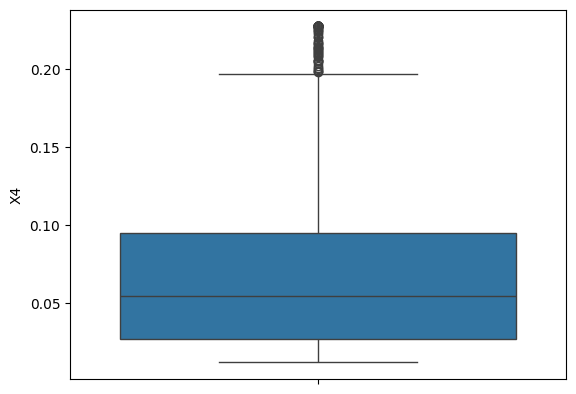

In [17]:
import seaborn as sns
sns.boxplot(train_data['X4'])

(array([ 180.,  306.,  330.,  163.,  450.,  800.,  696., 1139., 1056.,
         880.]),
 array([3.47475758, 3.68633887, 3.89792016, 4.10950145, 4.32108274,
        4.53266403, 4.74424532, 4.95582661, 5.1674079 , 5.37898919,
        5.59057048]),
 <BarContainer object of 10 artists>)

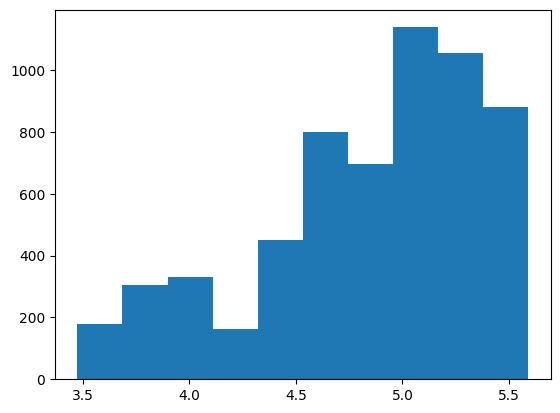

In [27]:
import numpy as np
train_data['X6'] = np.log1p(train_data['X6'])
plt.hist(train_data['X6'])